In [45]:
import pandas as pd

In [46]:

df1 = pd.read_csv(r"C:\Users\jeeva\Documents\project\Blood_samples_dataset_balanced_2(f).csv")
df2 = pd.read_csv(r"C:\Users\jeeva\Documents\project\blood_samples_dataset_test.csv")

data = pd.concat([df1, df2], ignore_index=True)
print(data)

       Glucose  Cholesterol  Hemoglobin  Platelets  White Blood Cells  \
0     0.739597     0.650198    0.713631   0.868491           0.687433   
1     0.121786     0.023058    0.944893   0.905372           0.507711   
2     0.452539     0.116135    0.544560   0.400640           0.294538   
3     0.136609     0.015605    0.419957   0.191487           0.081168   
4     0.176737     0.752220    0.971779   0.785286           0.443880   
...        ...          ...         ...        ...                ...   
2832  0.985163     0.412960    0.529993   0.263765           0.431288   
2833  0.581914     0.629325    0.491644   0.901473           0.347797   
2834  0.066669     0.404558    0.591041   0.228401           0.127461   
2835  0.901444     0.430680    0.243853   0.825551           0.493884   
2836  0.877912     0.597809    0.730440   0.462307           0.498438   

      Red Blood Cells  Hematocrit  Mean Corpuscular Volume  \
0            0.529895    0.290006                 0.631045   

In [47]:
data.isnull().sum()


Glucose                                      0
Cholesterol                                  0
Hemoglobin                                   0
Platelets                                    0
White Blood Cells                            0
Red Blood Cells                              0
Hematocrit                                   0
Mean Corpuscular Volume                      0
Mean Corpuscular Hemoglobin                  0
Mean Corpuscular Hemoglobin Concentration    0
Insulin                                      0
BMI                                          0
Systolic Blood Pressure                      0
Diastolic Blood Pressure                     0
Triglycerides                                0
HbA1c                                        0
LDL Cholesterol                              0
HDL Cholesterol                              0
ALT                                          0
AST                                          0
Heart Rate                                   0
Creatinine   

In [48]:
data.head()

,Glucose,Cholesterol,Hemoglobin,Platelets,White Blood Cells,Red Blood Cells,Hematocrit,Mean Corpuscular Volume,Mean Corpuscular Hemoglobin,Mean Corpuscular Hemoglobin Concentration,...,HbA1c,LDL Cholesterol,HDL Cholesterol,ALT,AST,Heart Rate,Creatinine,Troponin,C-reactive Protein,Disease
0,0.739597,0.650198,0.713631,0.868491,0.687433,0.529895,0.290006,0.631045,0.001328,0.795829,...,0.502665,0.215560,0.512941,0.064187,0.610827,0.939485,0.095512,0.465957,0.769230,Healthy
1,0.121786,0.023058,0.944893,0.905372,0.507711,0.403033,0.164216,0.307553,0.207938,0.505562,...,0.856810,0.652465,0.106961,0.942549,0.344261,0.666368,0.659060,0.816982,0.401166,Diabetes
2,0.452539,0.116135,0.544560,0.400640,0.294538,0.382021,0.625267,0.295122,0.868369,0.026808,...,0.466795,0.387332,0.421763,0.007186,0.506918,0.431704,0.417295,0.799074,0.779208,Thalasse
3,0.136609,0.015605,0.419957,0.191487,0.081168,0.166214,0.073293,0.668719,0.125447,0.501051,...,0.016256,0.040137,0.826721,0.265415,0.594148,0.225756,0.490349,0.637061,0.354094,Anemia
4,0.176737,0.752220,0.971779,0.785286,0.443880,0.439851,0.894991,0.442159,0.257288,0.805987,...,0.429431,0.146294,0.221574,0.015280,0.567115,0.841412,0.153350,0.794008,0.094970,Thalasse


In [49]:

x= data.drop("Disease", axis=1)
y = data["Disease"]

In [50]:
print(x.shape)
print(y.shape)

(2837, 24)
(2837,)


In [51]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

x_train, x_test, y_train, y_test = train_test_split(
    x, y, test_size=0.2, random_state=42,stratify=y
)

scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)


In [52]:
print(x_train.shape)
print(x_test.shape)


(2269, 24)
(568, 24)


In [53]:
from sklearn.linear_model import LogisticRegression


lr = LogisticRegression()
lr.fit(x_train, y_train)

y_pred = lr.predict(x_test)


In [54]:
from sklearn.metrics import accuracy_score
print("Logistic Regression Accuracy:",accuracy_score(y_test, y_pred))



Logistic Regression Accuracy: 0.8820422535211268


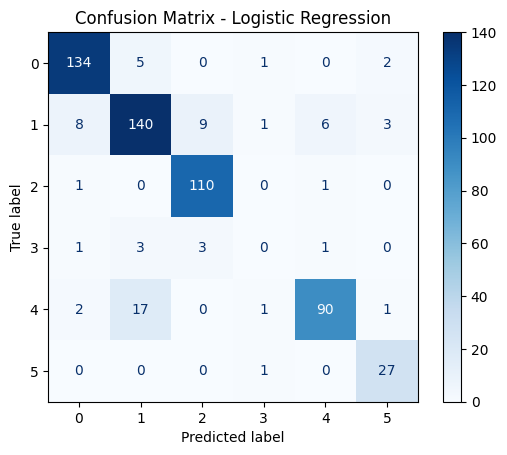

In [68]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
cm_lr = confusion_matrix(y_test, y_pred)

disp = ConfusionMatrixDisplay(confusion_matrix=cm_lr)
disp.plot(cmap="Blues")
plt.title("Confusion Matrix - Logistic Regression")
plt.show()


In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

accuracy = []
k_range = range(1, 25)

for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(x_train, y_train)
    y_pred_k = knn.predict(x_test)
    accuracy.append(accuracy_score(y_test, y_pred_k))


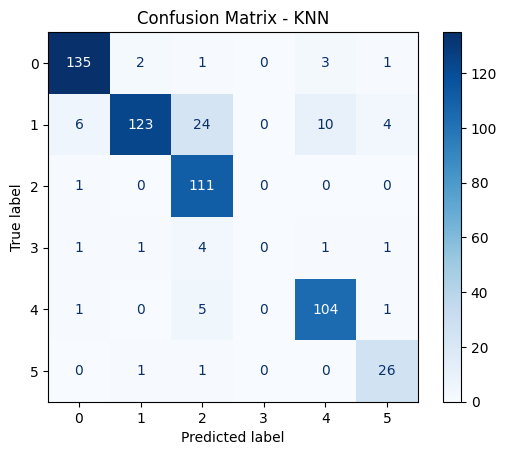

In [69]:
cm_knn = confusion_matrix(y_test, y_pred_k)

disp = ConfusionMatrixDisplay(confusion_matrix=cm_knn)
disp.plot(cmap="Blues")
plt.title("Confusion Matrix - KNN")
plt.show()


In [56]:
print("KNN Accuracy:", accuracy_score(y_test, y_pred_k))


KNN Accuracy: 0.8785211267605634


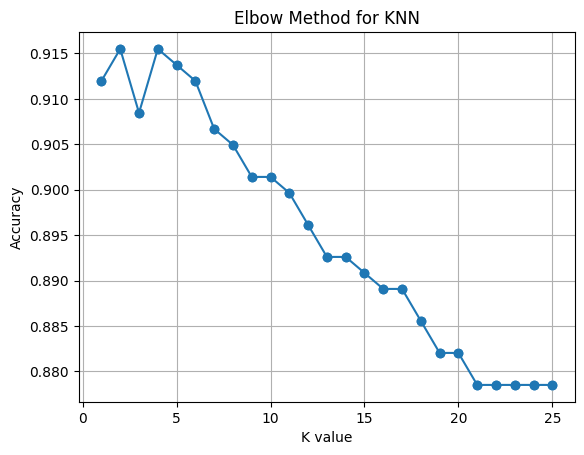

In [57]:
plt.figure()
plt.plot(k_range, accuracy, marker='o')
plt.scatter(k_range, accuracy)
plt.xlabel("K value")
plt.ylabel("Accuracy")
plt.title("Elbow Method for KNN")
plt.grid(True)
plt.show()


In [58]:
from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier(random_state=42)
dt.fit(x_train, y_train)

y_pred_dt = dt.predict(x_test)
print("Decision Tree Accuracy:", accuracy_score(y_test, y_pred_dt))


Decision Tree Accuracy: 0.9683098591549296


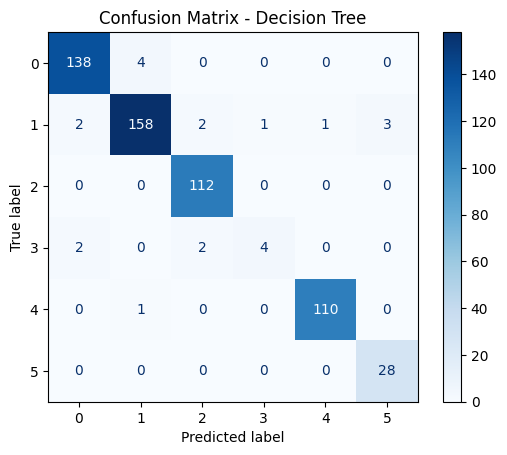

In [70]:
cm_dt = confusion_matrix(y_test, y_pred_dt)

disp = ConfusionMatrixDisplay(confusion_matrix=cm_dt)
disp.plot(cmap="Blues")
plt.title("Confusion Matrix - Decision Tree")
plt.show()


In [59]:
from sklearn.naive_bayes import GaussianNB

nb = GaussianNB()
nb.fit(x_train, y_train)

y_pred_nb = nb.predict(x_test)
print("Naive Bayes Accuracy:", accuracy_score(y_test, y_pred_nb))


Naive Bayes Accuracy: 0.8151408450704225


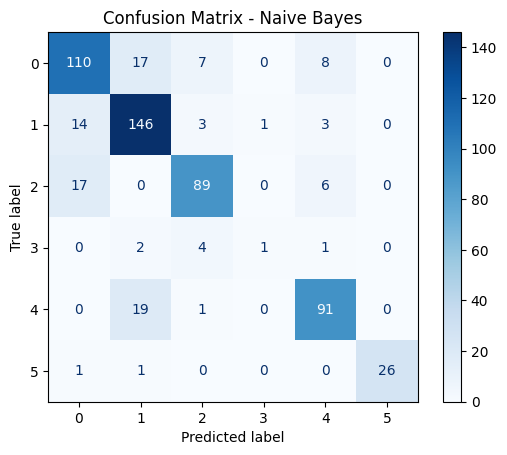

In [71]:
cm_nb = confusion_matrix(y_test, y_pred_nb)

disp = ConfusionMatrixDisplay(confusion_matrix=cm_nb)
disp.plot(cmap="Blues")
plt.title("Confusion Matrix - Naive Bayes")
plt.show()


In [60]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(x_train, y_train)

y_pred_rf = rf.predict(x_test)
print("Random Forest Accuracy:", accuracy_score(y_test, y_pred_rf))


Random Forest Accuracy: 0.9647887323943662


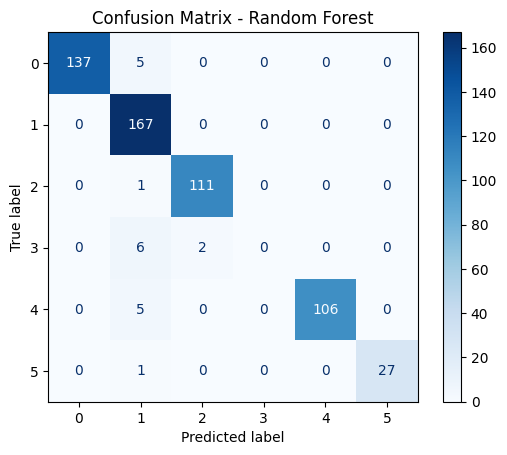

In [72]:
cm_rf = confusion_matrix(y_test, y_pred_rf)

disp = ConfusionMatrixDisplay(confusion_matrix=cm_rf)
disp.plot(cmap="Blues")
plt.title("Confusion Matrix - Random Forest")
plt.show()


In [61]:
from sklearn.ensemble import BaggingClassifier

bag = BaggingClassifier(
    estimator=DecisionTreeClassifier(),n_estimators=100,random_state=42
)
bag.fit(x_train, y_train)

y_pred_bag = bag.predict(x_test)
print("Bagging Accuracy:", accuracy_score(y_test, y_pred_bag))


Bagging Accuracy: 0.971830985915493


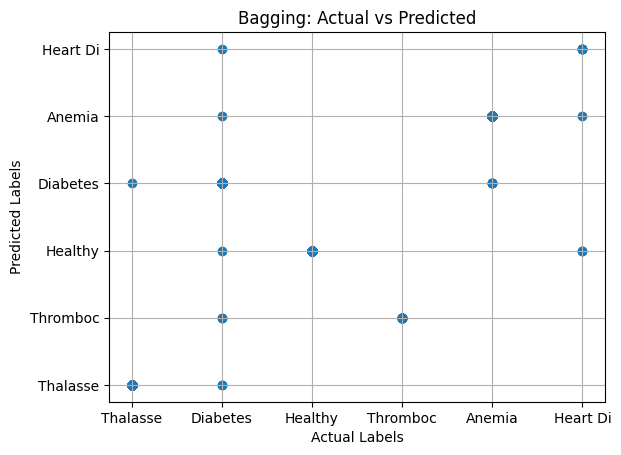

In [62]:
import matplotlib.pyplot as plt
plt.figure()
plt.scatter(y_test, y_pred_bag)
plt.xlabel("Actual Labels")
plt.ylabel("Predicted Labels")
plt.title("Bagging: Actual vs Predicted")
plt.grid(True)
plt.show()


In [63]:
from sklearn.ensemble import AdaBoostClassifier

ada = AdaBoostClassifier(n_estimators=100, random_state=42)
ada.fit(x_train, y_train)

y_pred_ada = ada.predict(x_test)
print("AdaBoost Accuracy:", accuracy_score(y_test, y_pred_ada))


AdaBoost Accuracy: 0.8503521126760564


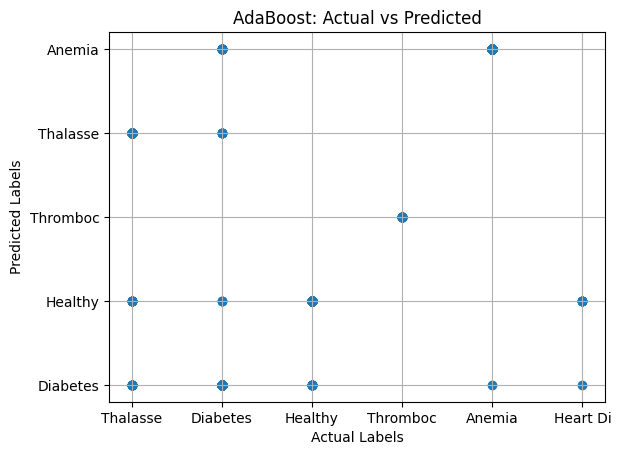

In [64]:


plt.figure()
plt.scatter(y_test, y_pred_ada)
plt.xlabel("Actual Labels")
plt.ylabel("Predicted Labels")
plt.title("AdaBoost: Actual vs Predicted")
plt.grid(True)
plt.show()


In [65]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
X_pca = pca.fit_transform(x_train)

print("Explained Variance Ratio:", pca.explained_variance_ratio_)


Explained Variance Ratio: [0.08121641 0.07715913]


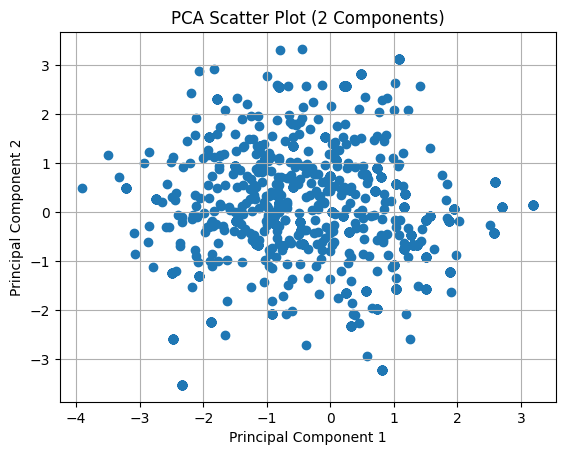

In [ ]:
plt.figure()
plt.scatter(X_pca[:, 0], X_pca[:, 1])
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.title("PCA Scatter Plot (2 Components)")
plt.grid(True)
plt.show()


In [67]:
import pickle

# Save scaler
with open("scaler.pkl", "wb") as f:
    pickle.dump(scaler, f)

# Save models
with open("logistic_model.pkl", "wb") as f:
    pickle.dump(lr, f)

with open("knn_model.pkl", "wb") as f:
    pickle.dump(knn, f)

with open("dt_model.pkl", "wb") as f:
    pickle.dump(dt, f)

with open("nb_model.pkl", "wb") as f:
    pickle.dump(nb, f)

with open("rf_model.pkl", "wb") as f:
    pickle.dump(rf, f)

with open("bagging_model.pkl", "wb") as f:
    pickle.dump(bag, f)

with open("adaboost_model.pkl", "wb") as f:
    pickle.dump(ada, f)

print("✅ All models saved successfully")


✅ All models saved successfully
